In [1]:
from __future__ import division
import os
import sys

import numpy as np
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
POPS = ['ASW','CEU','CHB','CHS','CLM','FIN','GBR','IBS','JPT','LWK','MXL','PUR','TSI','YRI']
print len(POPS)

14


In [3]:
dfs = {}
for pop in POPS:
    dfs[pop] = pd.read_csv('/DATA/raw/dbpshp/vcfs/dbPSHP_{}.1000g_phase1_release_v3.hard_filtering.vcf'.format(pop), sep='\t', header=None, names=['c','chrom_pos','rsid'], usecols=[0,1,2])

In [7]:
unique = pd.read_csv('/DATA/raw/dbpshp/unique_snps_rsids.txt', sep='\t', header=None, names=['c','chrom_pos','rsid'])

In [11]:
unique['num_pops'] = 0

In [12]:
%%time
for pop in POPS:
    unique['num_pops'] += unique['rsid'].isin(dfs[pop]['rsid'])

CPU times: user 20 ms, sys: 4 ms, total: 24 ms
Wall time: 23.2 ms


In [13]:
unique

,c,chrom_pos,rsid,num_pops
0,1,864938,rs78370858,3
1,1,1140435,rs1815606,1
2,1,1209636,rs3737722,2
3,1,1210471,rs11260577,2
4,1,1211292,rs6685064,2
5,1,1218086,rs6603788,1
6,1,1220136,rs2144440,4
7,1,1233941,rs1739855,2
8,1,1237036,rs2477782,2
9,1,1239339,rs11260584,1


In [52]:
def label_bars(rects,hist):
    for i,rect in enumerate(rects):
        height  = rect.get_height()
        ax.text(rect.get_x() +  rect.get_width()/2, height+0.025, '{:d}'.format(hist[i]), ha='center', va='center')

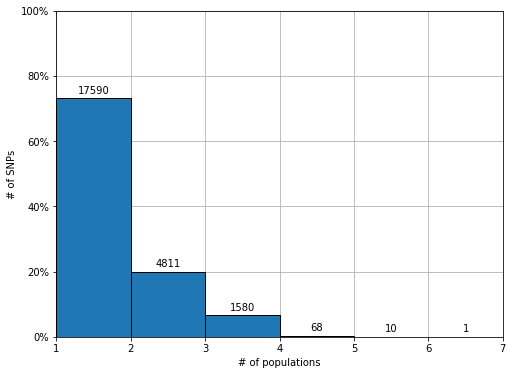

In [54]:
fig,ax = plt.subplots(1,1, figsize=(8,6), facecolor='#FFFFFF')

hist,bins = np.histogram(unique['num_pops'], bins=np.linspace(1,14,14))
pHist = hist/sum(hist)
cHist = pHist.cumsum()

rects = ax.bar(bins[:-1], pHist, width=bins[-1]-bins[-2], edgecolor='k', zorder=5, align='edge')
# ax.plot(bins[:-1], cHist, linewidth=3, c='r', zorder=6)

ax.set_ylim(0,1)
yticks = ax.get_yticks()
ax.set_yticklabels(['{:d}%'.format(int(y*100)) for y in yticks])

ax.set_xlim(1,5)
ax.set_xticks(np.linspace(1,7,7))

ax.set_xlabel('# of populations')
ax.set_ylabel('# of SNPs')

ax.grid(zorder=0)
label_bars(rects[:int(ax.get_xlim()[1]-1)], hist[:int(ax.get_xlim()[1]-1)])

In [46]:
ax.get_xlim()

(1.0, 6.0)

In [16]:
print '\n'.join(['{}\t{}'.format(pop,df.shape[0]) for pop,df in dfs.items()])

CLM	123
CHB	6524
ASW	10
TSI	782
MXL	676
YRI	76
LWK	92
CEU	923
CHS	8812
GBR	1154
IBS	2872
FIN	796
JPT	9396
PUR	45


In [17]:
s = 0
for pop,df in dfs.items():
    s += df.shape[0]
print s

32281


In [ ]:
for pop,df in dfs.items():
    df['is_unique'] = df['rsid'].is